SECOND STEP:

this notebook took the edited csv file from previous step and downloaded all the posters to file 100x100

then we delete rows with corrupt image and polish data

In [2]:
import pandas as pd 
import requests
from PIL import Image
import os
import PIL
import glob

In [7]:
data = pd.read_csv("FinalData.csv",encoding='latin1')
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080377,Comedy
1,1,tt0080549,Music
2,2,tt0080948,Music
3,3,tt0080360,Horror
4,4,tt0080569,Thriller
...,...,...,...
8942,8942,tt3237942,Horror
8943,8943,tt2912776,Music
8944,8944,tt4797082,Documentary
8945,8945,tt5350540,Documentary


In [8]:
year = 1980

In [9]:
imdbID = []

In [10]:
for i in range(len(data)):
    imdbID.append(data['imdbID'][i])
len(imdbID)

8947

In [27]:
genre = []
for i in range(len(data)):
    genre.append(data['Genre'][i])
len(genre)

8947

In [11]:
imdbID[0]

'tt0080377'

In [12]:
im = ""
for j in range(1980,2016):
    if os.path.exists(f"Movie_Poster_Dataset/{j}/{imdbID[0]}.jpg"):
        print(f"Movie_Poster_Dataset/{j}/{imdbID[0]}.jpg")
        im = Image.open(f"Movie_Poster_Dataset/{j}/{imdbID[0]}.jpg")
        im.save("Posters/try.jpg")

Movie_Poster_Dataset/1980/tt0080377.jpg


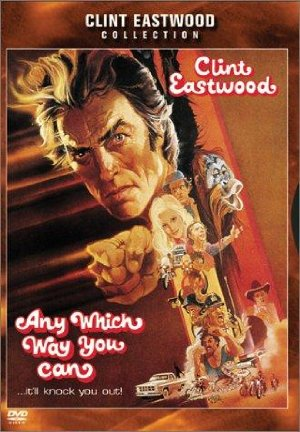

In [19]:
im

In [13]:
for i in range(len(imdbID)):
    for j in range(1980,2016):
        if os.path.exists(f"Movie_Poster_Dataset/{j}/{imdbID[i]}.jpg"):
            im = Image.open(f"Movie_Poster_Dataset/{j}/{imdbID[i]}.jpg")
            im.save(f"Posters/{imdbID[i]}.jpg")

In [23]:
deleteLater = [] # array holds indexes of pictures that don't open

In [15]:
imagePath = "Posters100x100"
os.makedirs(imagePath)

In [18]:
imdbID[0]

'tt0080377'

In [19]:
image = Image.open(f"Posters/{imdbID[0]}.jpg")
print(image.size)
resized_image = image.resize((100,100))
print(resized_image.size)

resized_image.save(f"{imagePath}/{imdbID[0]}.jpg")

(300, 432)
(100, 100)


In [24]:
# data augmentation
# making all posters 100*100
for i in range(len(imdbID)):
    try:
        image = Image.open(f"Posters/{imdbID[i]}.jpg")
        resized_image = image.resize((100,100))
        resized_image.save(f"{imagePath}/{imdbID[i]}.jpg")
    except:
        deleteLater.append(imdbID[i])


In [25]:
len(deleteLater) #262 record to be deleted

508

In [33]:
for i in range(len(deleteLater)):
    for j in range(len(data)):
        if deleteLater[i] == data['imdbID'][j]:
            print(f"{deleteLater[i]}   {data['Genre'][j]}")

tt0082606   Drama
tt0082606   Drama
tt0082606   Drama
tt0084434   Romance
tt0084434   Romance
tt0084434   Romance
tt0083564   Comedy
tt0083564   Comedy
tt0083564   Comedy
tt0083564   Family
tt0083943   Thriller
tt0083943   Thriller
tt0083943   Thriller
tt0084749   Fantasy
tt0084749   Fantasy
tt0084749   Fantasy
tt0084865   Music
tt0084865   Music
tt0084865   Music
tt0084412   Comedy
tt0084412   Comedy
tt0084412   Comedy
tt0083806   Comedy
tt0083806   Comedy
tt0083806   Comedy
tt0083806   Mystery
tt0083798   Mystery
tt0083798   Mystery
tt0083798   Mystery
tt0082250   Action
tt0082250   Action
tt0082250   Action
tt0084652   Thriller
tt0084652   Thriller
tt0084814   Comedy
tt0084814   Comedy
tt0084814   Comedy
tt0084814   Mystery
tt0083722   Horror
tt0083722   Horror
tt0083722   Fantasy
tt0084732   Crime
tt0084732   Crime
tt0084732   Crime
tt0084732   Mystery
tt0084084   Drama
tt0084084   Drama
tt0084084   Drama
tt0083885   Mystery
tt0083885   Mystery
tt0083885   Mystery
tt0084658   Thril

In [37]:
deleteLater

[61834,
 85426,
 416496,
 414982,
 397078,
 384814,
 466856,
 364955,
 449467,
 462519,
 419946,
 478049,
 450259,
 808146,
 475937,
 468492,
 822854,
 493247,
 471030,
 796335,
 499556,
 923752,
 478134,
 405508,
 476643,
 857265,
 831884,
 452623,
 762110,
 822849,
 478829,
 759612,
 1032856,
 780622,
 467200,
 813547,
 481797,
 412808,
 473389,
 762110,
 822849,
 478829,
 759612,
 1032856,
 780622,
 467200,
 813547,
 481797,
 412808,
 473389,
 888693,
 949489,
 783608,
 452608,
 870204,
 782867,
 488905,
 1152282,
 1183732,
 850669,
 929860,
 1205489,
 1034303,
 844666,
 1287845,
 454839,
 1241195,
 923811,
 1286800,
 1142972,
 1363127,
 1423592,
 1010055,
 1093370,
 1228953,
 1425244,
 806027,
 1187043,
 819755,
 1140941,
 892074,
 863136,
 1391544,
 1594971,
 1183276,
 1020543,
 1428050,
 882978,
 1156506,
 1331095,
 1334585,
 918575,
 1255951,
 37054,
 999913,
 1825918,
 1365023,
 449144,
 1530970,
 984155,
 1461418,
 1507566,
 1541788,
 1366409,
 1035729,
 2344672,
 2655938,
 23

In [38]:
newdata = data

In [39]:
for i in range (len(deleteLater)):
    newdata = newdata[newdata['imdbId'] != deleteLater[i]]
newdata

,Unnamed: 0,Unnamed: 0.1,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,Year
0,1483,1483,112951,http://www.imdb.com/title/tt112951,En avoir,6.8,Drama,https://images-na.ssl-images-amazon.com/images...,ou pas)
1,2880,2880,168589,http://www.imdb.com/title/tt168589,La Ciudad,7.2,Drama,https://images-na.ssl-images-amazon.com/images...,The City)
2,4692,4692,242994,http://www.imdb.com/title/tt242994,Va Savoir,7.0,Comedy,https://images-na.ssl-images-amazon.com/images...,Who Knows?)
4,6237,6237,304081,http://www.imdb.com/title/tt304081,Gigantic,7.8,Documentary,https://images-na.ssl-images-amazon.com/images...,A Tale of Two Johns)
6,7442,7442,80461,http://www.imdb.com/title/tt80461,"Bon Voyage, Charlie Brown",7.4,Animation,https://images-na.ssl-images-amazon.com/images...,and Don't Come Back!!)
...,...,...,...,...,...,...,...,...,...
15153,38869,38869,4504438,http://www.imdb.com/title/tt4504438,Dream/Killer,7.5,Documentary,https://images-na.ssl-images-amazon.com/images...,2015
15154,38870,38870,2145909,http://www.imdb.com/title/tt2145909,The Forgotten,5.5,Horror,https://images-na.ssl-images-amazon.com/images...,2014
15155,38871,38871,2320388,http://www.imdb.com/title/tt2320388,Hidden in the Woods,4.1,Thriller,https://images-na.ssl-images-amazon.com/images...,2016
15156,38872,38872,4882174,http://www.imdb.com/title/tt4882174,37,3.9,Drama,https://images-na.ssl-images-amazon.com/images...,2016


In [46]:
newdata = newdata.iloc[:,2:]
newdata

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,Year
0,112951,http://www.imdb.com/title/tt112951,En avoir,6.8,Drama,https://images-na.ssl-images-amazon.com/images...,ou pas)
1,168589,http://www.imdb.com/title/tt168589,La Ciudad,7.2,Drama,https://images-na.ssl-images-amazon.com/images...,The City)
2,242994,http://www.imdb.com/title/tt242994,Va Savoir,7.0,Comedy,https://images-na.ssl-images-amazon.com/images...,Who Knows?)
4,304081,http://www.imdb.com/title/tt304081,Gigantic,7.8,Documentary,https://images-na.ssl-images-amazon.com/images...,A Tale of Two Johns)
6,80461,http://www.imdb.com/title/tt80461,"Bon Voyage, Charlie Brown",7.4,Animation,https://images-na.ssl-images-amazon.com/images...,and Don't Come Back!!)
...,...,...,...,...,...,...,...
15153,4504438,http://www.imdb.com/title/tt4504438,Dream/Killer,7.5,Documentary,https://images-na.ssl-images-amazon.com/images...,2015
15154,2145909,http://www.imdb.com/title/tt2145909,The Forgotten,5.5,Horror,https://images-na.ssl-images-amazon.com/images...,2014
15155,2320388,http://www.imdb.com/title/tt2320388,Hidden in the Woods,4.1,Thriller,https://images-na.ssl-images-amazon.com/images...,2016
15156,4882174,http://www.imdb.com/title/tt4882174,37,3.9,Drama,https://images-na.ssl-images-amazon.com/images...,2016


In [47]:
finaldata = newdata.reset_index(drop=True)
finaldata

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,Year
0,112951,http://www.imdb.com/title/tt112951,En avoir,6.8,Drama,https://images-na.ssl-images-amazon.com/images...,ou pas)
1,168589,http://www.imdb.com/title/tt168589,La Ciudad,7.2,Drama,https://images-na.ssl-images-amazon.com/images...,The City)
2,242994,http://www.imdb.com/title/tt242994,Va Savoir,7.0,Comedy,https://images-na.ssl-images-amazon.com/images...,Who Knows?)
3,304081,http://www.imdb.com/title/tt304081,Gigantic,7.8,Documentary,https://images-na.ssl-images-amazon.com/images...,A Tale of Two Johns)
4,80461,http://www.imdb.com/title/tt80461,"Bon Voyage, Charlie Brown",7.4,Animation,https://images-na.ssl-images-amazon.com/images...,and Don't Come Back!!)
...,...,...,...,...,...,...,...
14891,4504438,http://www.imdb.com/title/tt4504438,Dream/Killer,7.5,Documentary,https://images-na.ssl-images-amazon.com/images...,2015
14892,2145909,http://www.imdb.com/title/tt2145909,The Forgotten,5.5,Horror,https://images-na.ssl-images-amazon.com/images...,2014
14893,2320388,http://www.imdb.com/title/tt2320388,Hidden in the Woods,4.1,Thriller,https://images-na.ssl-images-amazon.com/images...,2016
14894,4882174,http://www.imdb.com/title/tt4882174,37,3.9,Drama,https://images-na.ssl-images-amazon.com/images...,2016


In [54]:
for i in range(len(finaldata)):
    if not os.path.exists(f"../100x100/{finaldata['imdbId'][i]}.jpg"):
        # finaldata = finaldata[finaldata['imdbId'] != finaldata['imdbId'][i]]
        print(i)

In [48]:
other=[]
for i in range(len(finaldata)):
    try:
        Image.open(f"{data['imdbId'][i]}.jpg")
    except:
        other.append(i)
        
        